# Costo de Seguro Médico - Región "southwest"

El siguiente análisis modela la relación entre diversas variables vinculadas a la salud y el costo de seguro médico de una muestra de usuarios de la región sudoeste de Estados Unidos. El dataset utilizado se encuentra disponible en https://www.kaggle.com/awaiskaggler/insurance-csv.

### Carga de librerías

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline

### Carga de dataset

In [2]:
df = pd.read_csv(r"./insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.charges.mean()

13270.422265141257

### Preprocesado de datos

In [5]:
df.sex.unique(), df.smoker.unique(), df.region.unique()

(array(['female', 'male'], dtype=object),
 array(['yes', 'no'], dtype=object),
 array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object))

In [6]:
df1 = df[df["region"] == "southwest"]

In [7]:
categoricas = ["sex", "smoker"]

for var in categoricas:
    dummies = pd.get_dummies(df1[var], prefix=var)
    df1 = pd.concat([df1, dummies], axis = 1)

df1 = df1.drop(categoricas, axis = 1)
df1 = df1.drop("region", axis = 1)
df1.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.9,0,16884.924,1,0,0,1
12,23,34.4,0,1826.843,0,1,1,0
15,19,24.6,1,1837.237,0,1,1,0
18,56,40.3,0,10602.385,0,1,1,0
19,30,35.3,0,36837.467,0,1,0,1


In [8]:
df1.shape

(325, 8)

In [9]:
df = df1

El dataset presenta 325 muestras y 8 columnas, de las cuales 3 son predictoras iniciales, 4 son dummies y 1 es target.

### Declaración de variables predictoras y target

In [10]:
target = ["charges"]
predictoras = [x for x in df.columns.values if x not in target]

x = df[predictoras]
y = df[target]

### Visualización en gráfico de dispersión

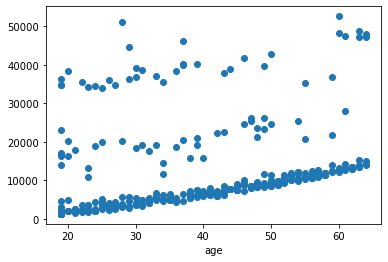

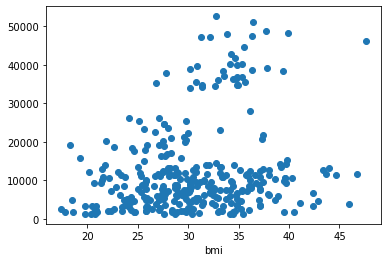

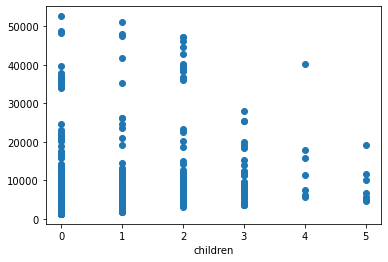

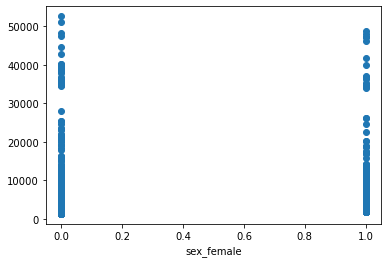

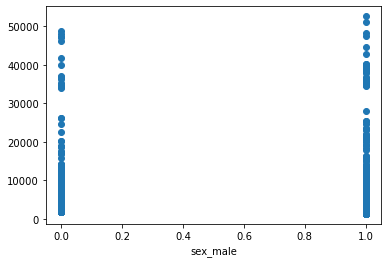

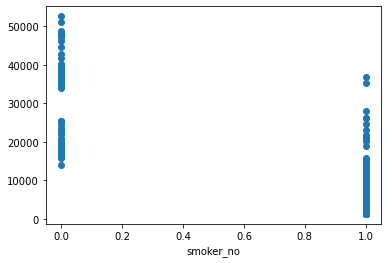

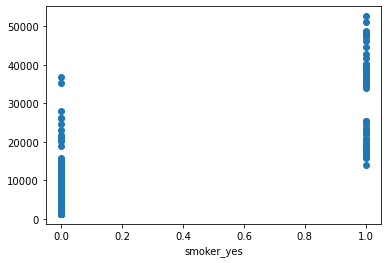

In [11]:
for var in x.columns.values:
    plt.scatter(x[var], y)
    plt.xlabel(var)
    plt.show()

### Modelado

In [12]:
rl = linear_model.LinearRegression()
rl.fit(x, y)

rl.coef_, rl.intercept_

(array([[   269.07852871,    258.90679232,     25.61513969,
            234.39116451,   -234.39116451, -12647.33622908,
          12647.33622908]]),
 array([1913.35959392]))

### Evaluación

In [13]:
y_pred = rl.predict(x)

mean_squared_error(y, y_pred), r2_score(y, y_pred), np.sqrt(mean_squared_error(y, y_pred))

(28499952.180573236, 0.7859679579884655, 5338.534647314114)

El MSE es 28499952.18 y el estadístico R2 es 0.7859. El modelo presenta menores variaciones que aquel que incluía todas las regiones.